<h1> Use this <a href="http://nbviewer.jupyter.org/github/AdaTeamElec/ADA2017-Homeworks/blob/master/project/IntroAda.ipynb">link</a> to properly display maps </h1>

# Intro

## Abstract
Terrorism is a subject largely covered in the media, and, unfortunately, we became accustomed to its presence worldwide, particularly over the last decade. Nevertheless, the problem we are facing today is not new. The source of certain conflicts dates from multiple decades, some of which are still lasting today. Our goal is to track and vizualize terrorism evolution through the past 50 years based on "The Global Terrorism Database". There are many questions we can ask ourselves about terrorism, such as "Is EU less safe nowadays ?", "Did attack mediums & reasons change over the years ?" or "Can we discriminate current/future conflictual zones ?". It would be presumptuous from us to say that we are going to solve major issues, or even predict futur attacks. However, through the exploration of the dataset, and by trying to answer those interrogations, we aim to grasp an overview and a better understanding to the evolution of terrorism.

## Plan

1. [Raw data understanding and cleaning](#raw_data)
    1. [Field selections using documentation](#fields_select)
    2. [Data exploration ](#data_exploration)
2. [Groups](#groups)

---

# 1 Raw data understanding  <a id='raw_data'></a>

## 1.1 Field selections using documentation  <a id='fields_select'></a>

First of all, we need to take a deep look into the details of our dataset to sort out the relevant data we will be using to conduct our observations. The Global Terrorism Dataset contains 135 features and approximately 170'000 entries. In order to select the label we will keep, we used the official [documentation](http://start.umd.edu/gtd/downloads/Codebook.pdf) from the dataset which describes each features precisely. Let's make a quick summary of the labels from the dataset we decided to use for our project.

* `eventid` : this is the id of any entry, written as 12 numbers (first 8 digits are the date of event and last 4 digits are a sequential case number for the given day). This will be used as our index too.
* `iyear`, `imonth`, `iday` : Year, month and day of the event. In some rare occasion the month or days are unknown.
* `country_txt` : id and name of the country where the event took place.
* `region_txt` : id and region where the event took place.
* `city` : This field contains the name of the city, village, or town in which the incident occurred. If the city, village, or town for an incident is unknown, then this field contains the smallest administrative area below provstate which can be found for the incident (e.g., district).  
* `latitude` and `longitude` : Latitude and Longitude values where the event took place.
* `doubtterr` : boolean value set as 1 if there is a doubt to whether the incident is an act of terrorism and 0 if there is no doubt of a terrorist attack.
* `success` : boolean value set as 1 if the incident was successful or 0 if it was not. As stated in the documentation, "Success of a terrorist strike is defined according to the tangible effects of the attack. Success is not judged in terms of the larger goals of the perpetrators. For example, a bomb that exploded in a building would be counted as a success even if it did not succeed in bringing the building down or inducing government repression." 
* `suicide` : boolean value set as 1 if the attack perpetrator did not intend to escape from the attack alive, 0 otherwise.
* `attacktype1_txt` : This field captures the general method of attack and often reflects the broad class of tactics used. It consists of nine categories, which are defined below :
    1. Assassination
    2. Armed Assault
    3. Bombing/Explosion
    4. Hijacking 
    5. Hostage taking (barricade incident) 
    6. Hostage taking (kidnapping)
    7. Facility/Infrastructure Attack
    8. Unarmed Assault
    9. Unknown 
* `targtype1_txt` : The target/victim type field captures the general type of target/victim. When a victim is attacked specifically because of his or her relationship to a particular person, such as a prominent figure, the target type reflects that motive. For example, if a family member of a government official is attacked because of his or her relationship to that individual, the type of target is “government.” This variable consists of the following 22 categories: <br>
    1. Business
    2. Government (General)
    3. Police
    4. Military
    5. Abortion related
    6. Airport & aircraft
    7. Government (Diplomatic), differs from the other entry as here are taken into account representation of a gouvernment on a foreign soil (embassy, consulate...)
    8. Educational institution
    9. Food or water supply
    10. Journalist & media
    11. Maritime facilities, including ports
    12. NGO
    13. Other
    14. Private citizens & property, include attacks in a public area against private citizens
    15. Religious figures/insititutions
    16. Telecommunication
    17. Terrorists/non-state militias
    18. Tourists
    19. Transportation (other than aviation)
    20. Unknown
    21. Utilities, facilities for generation or transmission of energy
    22. Violent political parties
* `gname` : This field contains the name of the group that carried out the attack. In order to ensure consistency in the usage of group names for the database, the GTD database uses a standardized list of group names that have been established by project staff to serve as a reference for all subsequent entries.  
* `gname2` : This field is used to record the name of the second perpetrator when responsibility for the attack is attributed to more than one perpetrator. Conventions follow “Perpetrator Group” field.  
* `gname3` : same as for gname2
* `nperps` : This field indicates the total number of terrorists participating in the incident. (In the instance of multiple perpetrator groups participating in one case, the total number of perpetrators, across groups, is recorded). There are often discrepancies in information on this value.   
* `weaptype1_txt` : This field records the general type of weapon used in the incident. It consists of the following categories: <br>
    1. Biological
    2. Chemical
    3. Radiological
    4. Nuclear
    5. Firearms
    6. Explosive/bonbs/dynamite
    7. Fake weapons
    8. Incendiary
    9. Melee
    10. Vehicle
    11. Sabotage equipment 
    12. Other
    13. Unknown
* `nkill` : This field stores the number of total confirmed fatalities for the incident. The number includes all victims and attackers who died as a direct result of the incident.   
* `nkillter`: This field stores the number of confirmed terrorists fatalities.
* `nwound` : This field records the number of confirmed non-fatal injuries to both perpetrators and victims. 
* `nwoundte` : This field records the number of confirmed non-fatal terrorists injuries. 


We are now reduced to 22 features instead of the original 135 from the dataset. A part from the kept features, we explored some other features such as `weaptype2`, `weapsubtype` or `motive` to see if those would bring added informations thus be relevant to use also. However, we decided to drop them because of a too large amount of NaN or unknown entries. Our choice focused on labels that would allow us to answer the questions asked in the description, as well as labels relevant to get a pertinent visualization of the data.


## 1.2 Data exploration  <a id='data_exploration'></a>

Let's begin the work by importing the libraries and creating a dataframe to explore the data furthermore. As cautious wannabe data scientist, we will explore in detail each field and check the proportion of non categorized or Unknown-labeled entries to make sure each feature we kept countains relevant data. <br>
*NOTE : during this section we are only exploring data without drawing any conclusions nor making assumptions regarding the data. This will come further in our analysis*

In [1]:
import pandas as pd
import os
import numpy as np
import datetime
import time
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
import warnings

%pylab inline
%matplotlib inline

sns.set_context("notebook")
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [2]:
data_path = 'data'
gtd_path = os.path.join(data_path, 'globalterrorismdb_0617dist.csv')

In [3]:
fields = ['eventid', 'iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'city', 
          'latitude', 'longitude', 'doubtterr', 'attacktype1_txt',  'success', 
          'suicide', 'weaptype1_txt', 'targtype1_txt', 'gname', 'gname2', 
          'gname3', 'compclaim', 'nperps', 'nkill', 'nkillter', 'nwound', 'nwoundte']
date_fileds = ['iyear', 'imonth', 'iday']

df = pd.read_csv(gtd_path, encoding='latin', usecols=fields, index_col='eventid', low_memory=False)

In [4]:
print('Is index unique: {}'.format(df.index.is_unique))

Is index unique: True


In [5]:
df.dtypes

iyear                int64
imonth               int64
iday                 int64
country_txt         object
region_txt          object
city                object
latitude           float64
longitude          float64
doubtterr            int64
success              int64
suicide              int64
attacktype1_txt     object
targtype1_txt       object
gname               object
gname2              object
gname3              object
nperps             float64
compclaim          float64
weaptype1_txt       object
nkill              float64
nkillter           float64
nwound             float64
nwoundte           float64
dtype: object

According to the documentation, month or day (or both) can be set to 0 if the exact date of the attack is unknown. We created a function to set the value to of the field to 1 in the case of an unknown date. We then count the proportion of unknown date within the dataset, just to make sure it is not too high.

In [6]:
# According to documentation both month and day can be 0 (if unknown), we set them to 0
def parse_date(row):
    return datetime.date(row.iyear, int(row.imonth) if not np.isnan(row.imonth) else 1, 
                         int(row.iday) if not np.isnan(row.iday) else 1)

In [7]:
# Count number entries with uncertain date (either month or day)
df[date_fileds] = df[date_fileds].replace(0, np.nan)
n_uncertain = np.sum(np.sum(df[date_fileds].isnull(), axis=1) != 0 )
df['date'] =df.apply(lambda x: parse_date(x), axis=1)
print('Uncertain dates: {:.2f}%, ({}/{})'.format(100*n_uncertain/len(df), n_uncertain, len(df)))

Uncertain dates: 0.52%, (891/170350)


We check the proportion of entries without geographic coordinates. In the case when the coordinates are unknow, we decided to completely drop the row of data. This is due to the fact that we want to have the location informations in order to represent the data with maps.

In [8]:
n_geo = len(df)
df.dropna(subset=('latitude', 'longitude'), inplace=True)
print('Entries without geographic coordinates droped: {:.2f}%, ({}/{})'.format(
    100*(n_geo-len(df))/n_geo, n_geo-len(df), n_geo))

Entries without geographic coordinates droped: 2.70%, (4606/170350)


We check that each item has a valid entry for city, country or region. We see that it is missing a few entries for city name, but as we will not use this feature often, we won't drop those entries.

In [9]:
print('Proportion of data without a valid city entry: {:.2f}%'.format(100*(1-df.city.value_counts().sum()/len(df))))
print('Proportion of data without a valid country entry: {:.2f}%'.format(100*(1-df.country_txt.value_counts().sum()/len(df))))
print('Proportion of data without a valid region entry: {:.2f}%'.format(100*(1-df.region_txt.value_counts().sum()/len(df))))

Proportion of data without a valid city entry: 0.26%
Proportion of data without a valid country entry: 0.00%
Proportion of data without a valid region entry: 0.00%


We are now checking the amount of attacks that are categorized as unsure terror attacks. We wanted to check this particular feature to make sure that in the dataset there is a large majority of attacks that are hundred percent sure to be terror attack. If it would not have been the case, the whole dataset as well as our study would not have been relevant. <br>
There is 15% of attacks for which there is a doubt to categorize them as terror attacks. The entry -9 represent cases for which the value was not available at all when the dataset was constructed. We decided to assign them as if it was sure they were terror attacks.

In [10]:
print('Repartition of data in %:\n{}'.format(100*df.doubtterr.value_counts()/len(df)))
df.loc[df.doubtterr < 0, 'doubtterr'] = 0
df.doubtterr = df.doubtterr.astype('category')
df.doubtterr.cat.categories = ['N_DOUBT', 'DOUBT']
print('\nRepartition of data in %(after cleaning):\n{}'.format(100*df.doubtterr.value_counts()/len(df)))

Repartition of data in %:
 0    76.668839
 1    15.341732
-9     7.989429
Name: doubtterr, dtype: float64

Repartition of data in %(after cleaning):
N_DOUBT    84.658268
DOUBT      15.341732
Name: doubtterr, dtype: float64


For the two upcoming fields, data is, as expected, binary and completly categorized.

In [11]:
print('Unique values in field: {}'.format(np.unique(df.success)))
print('Percentage of sucessful attacks: {:.2f}%'.format(100*df.success.mean()))

Unique values in field: [0 1]
Percentage of sucessful attacks: 89.48%


In [12]:
print('Unique values in field: {}'.format(np.unique(df.suicide)))
print('Percentage of suicide attacks: {:.2f}%'.format(100*df.suicide.mean()))

Unique values in field: [0 1]
Percentage of suicide attacks: 3.47%


Time to explore if the proportion of attack types and see if there are any NaN values.

In [13]:
print('Type of attack and repartition in dataset in %')
100*df.attacktype1_txt.value_counts()/len(df)

Type of attack and repartition in dataset in %


Bombing/Explosion                      49.271769
Armed Assault                          23.284101
Assassination                          10.808838
Hostage Taking (Kidnapping)             5.884979
Facility/Infrastructure Attack          5.681050
Unknown                                 3.666498
Unarmed Assault                         0.533353
Hostage Taking (Barricade Incident)     0.526716
Hijacking                               0.342697
Name: attacktype1_txt, dtype: float64

We do the same for the repartion of target types and the repartion of weapon types.

In [14]:
print('Type of target and repartition in dataset in %')
100*df.targtype1_txt.value_counts()/len(df)

Type of target and repartition in dataset in %


Private Citizens & Property       23.565861
Military                          14.706415
Police                            13.615576
Government (General)              11.967854
Business                          11.754272
Transportation                     3.861377
Utilities                          3.246573
Unknown                            2.900256
Religious Figures/Institutions     2.497225
Educational Institution            2.477314
Government (Diplomatic)            2.035669
Terrorists/Non-State Militia       1.684526
Journalists & Media                1.641085
Violent Political Party            1.019645
Airports & Aircraft                0.782532
Telecommunication                  0.584033
NGO                                0.533353
Other                              0.366831
Tourists                           0.246163
Maritime                           0.181002
Food or Water Supply               0.173762
Abortion Related                   0.158678
Name: targtype1_txt, dtype: floa

In [15]:
print('Repartition of weapon type in dataset in %')
100*df.weaptype1_txt.value_counts()/len(df)

Repartition of weapon type in dataset in %


Explosives/Bombs/Dynamite                                                      51.464910
Firearms                                                                       32.129067
Unknown                                                                         7.842214
Incendiary                                                                      6.193889
Melee                                                                           1.958442
Chemical                                                                        0.159885
Sabotage Equipment                                                              0.072401
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)     0.069987
Other                                                                           0.062747
Biological                                                                      0.019910
Fake Weapons                                                                    0.018704
Radiological         

We now check the number of unique entries that categorize the name of the group conducting the terror attacks. According to the documentation, a work as been done to standardize the entries within this field by using a specific list of group names established by project staff.

In [16]:
pd.value_counts(df[['gname', 'gname2', 'gname3']].values.ravel('K')).head(10)

Unknown                                             76999
Taliban                                              6590
Islamic State of Iraq and the Levant (ISIL)          4317
Shining Path (SL)                                    4303
Farabundo Marti National Liberation Front (FMLN)     2952
Al-Shabaab                                           2675
Irish Republican Army (IRA)                          2660
Revolutionary Armed Forces of Colombia (FARC)        2349
New People's Army (NPA)                              2151
Boko Haram                                           2080
dtype: int64

In [17]:
df[['gname', 'gname2', 'gname3']] = df[['gname', 'gname2', 'gname3']].replace({'Unknown': np.nan})
n_group = len(pd.unique(df[['gname', 'gname2', 'gname3']].values.ravel('K')))
print('Number of unique group name: {}'.format(n_group))

Number of unique group name: 3449


We will now explore data with numerical values. First we look at field corresponding to the number of perpretrators of an attack. As expected, it countains a large amount of unknown entries as it is not easy to know how many perpetrators of an attack there was. We decided to keep this row anyway as to explore, if possible, the evolution of terror attack, and the number of perpetrators is a value that could give an insight to know this.

In [18]:
df.loc[df.nperps < 0, 'nperps'] = np.nan
print('Percentage of entries with unknown # Perpretrators {:.2f}%'.format(100*np.sum(df.nperps.isnull())/len(df)))
print('Range of # Perpretrators: {} upto {}'.format(int(df.nperps.min()), int(df.nperps.max())))

Percentage of entries with unknown # Perpretrators 84.50%
Range of # Perpretrators: 0 upto 25000


We look now at the number of victims of terror attacks. As the dataset count the total number of fatalities, perpetrators included, we found it relevant to keep also the number of killed terrorists to conduct our analysis. Same logic applies for the number of wounded.

In [19]:
df['nkillnter'] = df.nkill-df.nkillter.fillna(0)
df.loc[df.nkillnter < 0, 'nkillnter'] = 0

print('Range total # of victims: [{}, {}]'.format(df.nkill.min(), df.nkill.max()))
print('Range # of non terrorists victims: [{}, {}]'.format(df.nkillnter.min(), df.nkillnter.max()))
print('Range # of terrorists victims: [{}, {}]'.format(df.nkillter.min(), df.nkillter.max()))

Range total # of victims: [0.0, 1500.0]
Range # of non terrorists victims: [0.0, 1500.0]
Range # of terrorists victims: [0.0, 500.0]


In [20]:
df['nwoundnter'] = df.nwound-df.nwoundte.fillna(0)
df.loc[df.nwoundnter < 0, 'nwoundnter'] = 0

print('Range total # of wounded: [{}, {}]'.format(df.nwound.min(), df.nwound.max()))
print('Range # of non terrorists wounded: [{}, {}]'.format(df.nwoundnter.min(), df.nwoundnter.max()))
print('Range # of terrorists wounded: [{}, {}]'.format(df.nwoundte.min(), df.nwoundte.max()))

Range total # of wounded: [0.0, 7366.0]
Range # of non terrorists wounded: [0.0, 7366.0]
Range # of terrorists wounded: [0.0, 200.0]


Now we have a better understanding of our dataset and we are confident to have a dataset we can work with. We can go further in our analysis and do data visualization.

---

# 2. Groups  <a id='groups'></a>


We can see that we have for each group: the number of attacks (`frequ`), number of casualities (`nkill`), coordinates (`latitude`, `longitude`) and country (`country`).

In [21]:
df_groups = pd.read_csv(os.path.join(data_path, 'groups_stats.csv'), index_col=0)
df_groups.head()

,frequ,nkill,latitude,longitude,country
Taliban,6590.0,24637.0,34.091128,69.093347,Afghanistan
Islamic State of Iraq and the Levant (ISIL),4317.0,31189.0,34.316204,43.868365,Iraq
Shining Path (SL),4303.0,10171.0,-12.046378,-77.042791,Peru
Farabundo Marti National Liberation Front (FMLN),2952.0,7474.0,13.760003,-88.949766,El Salvador
Al-Shabaab,2675.0,7347.0,2.046871,45.318141,Somalia


We define here the basic function to get color accorging to number of casualities and logaritm scale of values (see next cell for explanation)

In [22]:
N_min = 20
len(df_groups.loc[df_groups.frequ > N_min])

365

In [23]:
# Create 2d table with for matching pair-wise groups
frames = [ df[['gname', 'gname2', 'compclaim']].values, 
           df[['gname', 'gname3', 'compclaim']].values, 
           df[['gname2', 'gname3', 'compclaim']].values ]
df_multi = pd.DataFrame(np.array(frames).reshape((-1, 3)))
df_multi.columns = ['gname', 'gname2', 'compclaim']
df_multi.compclaim = df_multi.compclaim.replace({-9: np.nan})
# Drop line with NaN (not relevant matching)
df_multi.dropna(subset=('gname', 'gname2', 'compclaim'), inplace=True)
print('Number of colaboration/comp:', len(df_multi))
df_multi.head()

Number of colaboration/comp: 833


,gname,gname2,compclaim
4208,Independent Armed Revolutionary Commandos (CRIA),Palestine Liberation Organization (PLO),1.0
4209,Independent Armed Revolutionary Commandos (CRIA),Palestine Liberation Organization (PLO),1.0
4210,Independent Armed Revolutionary Commandos (CRIA),Palestine Liberation Organization (PLO),1.0
4211,Independent Armed Revolutionary Commandos (CRIA),Palestine Liberation Organization (PLO),1.0
4230,Palestine Liberation Organization (PLO),Puerto Rican Nationalists,1.0


In [24]:
# Set attrbute value to 1
df_coop = df_multi.loc[df_multi.compclaim == 0].groupby(['gname', 'gname2']).size().reset_index(name='n_coop')
df_comp = df_multi.loc[df_multi.compclaim == 1].groupby(['gname', 'gname2']).size().reset_index(name='n_comp')
df_link = pd.merge(df_coop, df_comp, how='outer').fillna(0)
df_link.head()

,gname,gname2,n_coop,n_comp
0,Ahrar Al-Jalil (Free People of the Galilee),Al-Aqsa Martyrs Brigade,1.0,0.0
1,Ahrar Al-Jalil (Free People of the Galilee),Popular Front for the Liberation of Palestine ...,1.0,0.0
2,Ahrar al-Sham,Al-Nusrah Front,9.0,1.0
3,Ahrar al-Sham,Al-Sham Legion,5.0,0.0
4,Ahrar al-Sham,Ansar al-Din Front,1.0,0.0


---
# Graph clustering example

Based on [Spectral Analysis of Signed Graphs for Clustering, Prediction and Visualization](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.155.1809&rep=rep1&type=pdf)

In [224]:
from sklearn.cluster import KMeans
import scipy
import numpy as np
import networkx as nx

def get_dummy(type_=0):
    if type_ == 0:
        W = np.zeros((14,14))
        np.fill_diagonal(W[1:, 0:], 1, wrap=True)
        W[-1, 0] = 1; W[3, 2] = -1; W[7, 6] = -1; W[-1, -2] = -1; 
        W = W + W.T
    else:
        W = np.zeros((7,7))
        np.fill_diagonal(W[1:, 0:], 1, wrap=True)
        np.fill_diagonal(W[0:, 1:], 1, wrap=True)
        W[0, -1] = -1
        W[-1, 0] = -1
    W = scipy.sparse.csr_matrix(W) 
    return W

def get_pos(W, cgt, r=3):
    
    n_cluster = len(np.unique(cgt))
    angle = (2*pi/n_cluster)*np.arange(n_cluster)
    center = np.array([ r*np.cos(angle), r*np.sin(angle)]).T
    pos = np.zeros((len(cgt), 2))
    
    for i in range(n_cluster):
        n_sub = np.sum(cgt == i)
        angle = (2*pi/n_sub)*np.arange(n_sub)
        pos[cgt == i] = center[i] + np.array([np.cos(angle), np.sin(angle)]).T
    
    return pos
    
def draw_graph(W, cgt=None, labels=None):
    # Build graph fro W
    G = nx.from_scipy_sparse_matrix(W)
    val = [-W[g[0],g[1]] for g in G.edges]
    # Compute Laplacian to get spatial representation
    L = compute_L(W, normalized=True)
    lam, V = get_basis_L(L)
    id_first = np.nonzero(lam > 1e-10)[0][0]
    base_g = V[:,id_first:id_first+2]
    if cgt is not None and labels is not None:
        base_g = get_pos(W, cgt)
    
    # Plot graph
    plt.figure(figsize=(12,12))
    if cgt is None:
        nx.draw_networkx_nodes(G, pos=base_g, node_color='k')
    else:
        nx.draw_networkx_nodes(G, pos=base_g, node_color=cgt, node_cmap=plt.cm.hsv)
    nx.draw_networkx_edges(G, pos=base_g, edge_color=val, width=4, 
                           edge_cmap=plt.cm.bwr, edge_vmax=1, edge_vmin=-1)
    nx.draw_networkx_labels(G, base_g, font_color='w')
    if labels is not None:
        d = dict(zip(np.arange(len(labels)), labels))
        base_g_lab = base_g
        base_g_lab[:, 1] += 0.3
        nx.draw_networkx_labels(G, base_g, d, font_weight='bold', font_size=12)
        
    
def compute_L(W, normalized=False):
    if normalized:
        N = W.shape[0]
        d = np.power(np.sum(np.abs(W), axis=1), -0.5)
        D = scipy.sparse.diags(np.ravel(d), 0).tocsc()
        L = scipy.sparse.identity(N) - D * W * D
    else:
        D = scipy.sparse.diags(np.ravel(np.abs(W).sum(1)), 0)
        L = (D - W).tocsc()
    return L

def get_basis_L(L, k=3):
    lam, V = scipy.sparse.linalg.eigsh(L, k=k, which='SM')
    return lam, V

def get_clusters(L, k=3):
    lam, V = scipy.sparse.linalg.eigsh(L, k=k, which='SM')
    
    L = compute_L(W, normalized=True)
    lam, V = get_basis_L(L)
    id_first = np.nonzero(lam > 1e-10)[0][0]
    X = V[:,id_first:]
    
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    return kmeans.labels_

def reindex_W_with_classes(W,C):
    """
    Function that reindexes W according to communities/classes

    Usage:
      [reindexed_W,reindexed_C] = reindex_W_with_C(W,C)

    Notations:
      n = nb_data
      nc = nb_communities

    Input variables:
      W = Adjacency matrix. Size = n x n.
      C = Classes used for reindexing W. Size = n x 1. Values in [0,1,...,nc-1].

    Output variables:
      reindexed_W = reindexed adjacency matrix. Size = n x n.
      reindexed_C = reindexed classes C. Size = n x 1. Values in [0,1,...,nc-1].
    """

    n = C.shape[0] # nb of vertices
    nc = len(np.unique(C)) # nb of communities
    reindexing_mapping = np.zeros([n]) # mapping for reindexing W
    reindexed_C = np.zeros([n]) # reindexed C
    tot = 0
    for k in range(nc):
        cluster = (np.where(C==k))[0]
        length_cluster = len(cluster)
        x = np.array(range(tot,tot+length_cluster))
        reindexing_mapping[cluster] = x
        reindexed_C[x] = k
        tot += length_cluster
        
    idx_row,idx_col,val = scipy.sparse.find(W)
    idx_row = reindexing_mapping[idx_row]
    idx_col = reindexing_mapping[idx_col]
    reindexed_W = scipy.sparse.csr_matrix((val, (idx_row, idx_col)), shape=(n, n))

    return reindexed_W,reindexed_C

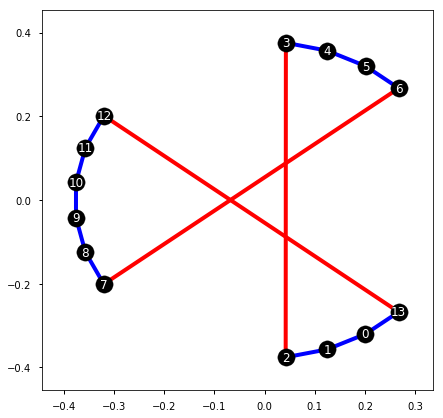

In [194]:
W = get_dummy()
draw_graph(W)

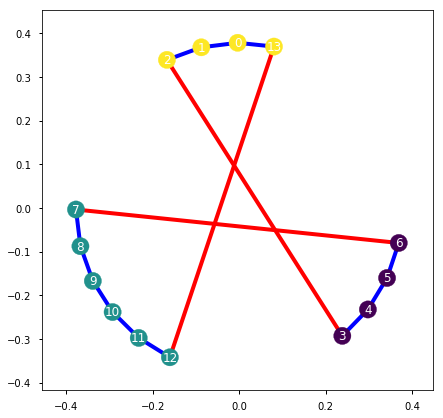

In [195]:
L = compute_L(W, normalized=False)
cgt = get_clusters(L, 3)
draw_graph(W, cgt)

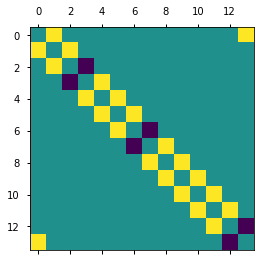

In [196]:
plt.matshow(W.toarray())

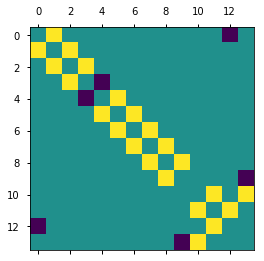

In [197]:
Wr, _ = reindex_W_with_classes(W, cgt)
plt.matshow(Wr.toarray())

---
# Graph clustering -> data

In [198]:
from scipy.sparse import csc_matrix
import scipy
import networkx as nx

groups = pd.unique(df_link[['gname', 'gname2']].values.ravel('K'))
d = dict(zip(groups, np.arange(len(groups))))

# Create Adjacency matrix with # of attack claimed together as weight between links (e.i. groups)
W_coop = csc_matrix((df_link['n_coop'], 
                (df_link['gname'].replace(d), df_link['gname2'].replace(d))), shape=(len(d), len(d)))
W_coop = 0.5*(W_coop.T+W_coop)

W_comp = csc_matrix((df_link['n_comp'], 
                (df_link['gname'].replace(d), df_link['gname2'].replace(d))), shape=(len(d), len(d)))
W_comp = 0.5*(W_comp.T+W_comp)

W = (W_coop - W_comp) > 0

In [199]:
G = nx.from_scipy_sparse_matrix(W)
largest_cc = max(nx.connected_components(G), key=len)
ids_keep = np.array(list(largest_cc))
sub_groups_name = groups[ids_keep]
print(len(ids_keep))

15


In [200]:
for g in nx.connected_components(G):
    if len(g) >= 5:
        print('Cluster {}: '.format(len(g)), groups[list(g)])

Cluster 6:  ['Ahrar Al-Jalil (Free People of the Galilee)' 'Al-Aqsa Martyrs Brigade'
 'Tanzim' 'Ansar Al Sunnah (Palestine)'
 'Democratic Front for the Liberation of Palestine (DFLP)'
 'Popular Front for the Liberation of Palestine (PFLP)']
Cluster 15:  ['Ahrar al-Sham' 'Free Idlib Army' 'Ajnad al-Sham' 'Jund al-Aqsa'
 'Al-Furqan Brigades' 'Islamic Front (Syria)' 'Jaish al-Sunnah'
 'Al-Nasir Army (Syria)' 'Jaysh al-Islam (Syria)' 'Al-Nusrah Front'
 'Al-Sham Legion' 'Ansar al-Din Front' 'Free Syrian Army' 'Shamiya Front'
 'Southern Front']
Cluster 9:  ['Harkatul Jihad-e-Islami' 'Al-Mansoorian' 'Lashkar-e-Taiba (LeT)'
 'Jaish-e-Mohammad (JeM)' '313 Brigade' 'Deccan Mujahideen'
 'Students Islamic Movement of India (SIMI)' 'Hizbul Mujahideen (HM)'
 'Indian Mujahideen']
Cluster 5:  ['United Liberation Front of Assam (ULFA)'
 'United National Liberation Front (UNLF)'
 'National Socialist Council of Nagaland-Khaplang (NSCN-K)'
 "People's Liberation Army (India)"
 "People's Revolutionary Party

In [201]:
W = W_coop - W_comp
W = W.toarray()[ids_keep, :]
W = W[:, ids_keep]
#W[W > 0] = 1
#W[W < 0] = -1
W = scipy.sparse.csr_matrix(W)

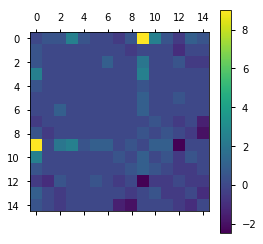

In [202]:
plt.matshow(W.toarray())
plt.colorbar()

In [203]:
def cut_loss(W, cgt):
    nk = np.unique(cgt)
    Ap = np.maximum(W.toarray(), 0)
    An = np.maximum(-W.toarray(), 0)
    cut = 0
    for k in nk:
        id_x = cgt == k
        id_y = cgt != k
        # Count positive links with other cluster
        cutp = np.sum(Ap[id_x, :][:, id_y])
        # Count negative links inside< cluster
        cutn = np.sum(An[id_x, :][:, id_x])
        lambda_ = (1/np.sum(id_x) + 1/np.sum(id_y))*len(id_x)
        cut += lambda_*(cutp + cutn)
    cut = cut/len(nk)
    return cut

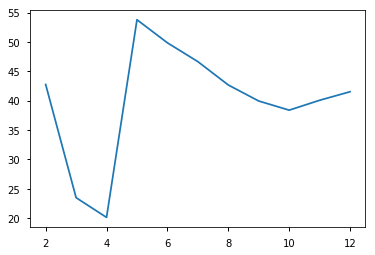

In [204]:
nk = 12
loss = np.zeros((nk, 2))
L = compute_L(W, normalized=False)

for i, k in enumerate(range(1,nk+1)):
    cgt = get_clusters(L, k)
    loss[i, 0] = k
    loss[i, 1] = cut_loss(W, cgt)
    
plt.plot(loss[:,0], loss[:, 1])

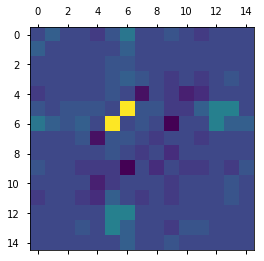

In [205]:
Wr, _ = reindex_W_with_classes(W, cgt)
plt.matshow(Wr.toarray())

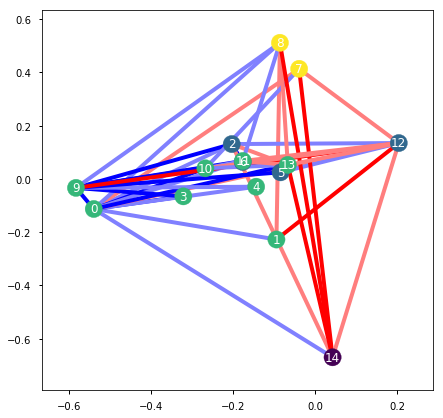

In [206]:
cgt = get_clusters(L, 4)
draw_graph(W, cgt)

In [207]:
for c in np.unique(cgt):
    print('Group: ', groups[ids_keep][cgt == c])

Group:  ['Southern Front']
Group:  ['Ajnad al-Sham' 'Islamic Front (Syria)' 'Jaish al-Sunnah'
 'Free Syrian Army']
Group:  ['Ahrar al-Sham' 'Free Idlib Army' 'Jund al-Aqsa' 'Al-Furqan Brigades'
 'Al-Nusrah Front' 'Al-Sham Legion' 'Ansar al-Din Front' 'Shamiya Front']
Group:  ['Al-Nasir Army (Syria)' 'Jaysh al-Islam (Syria)']


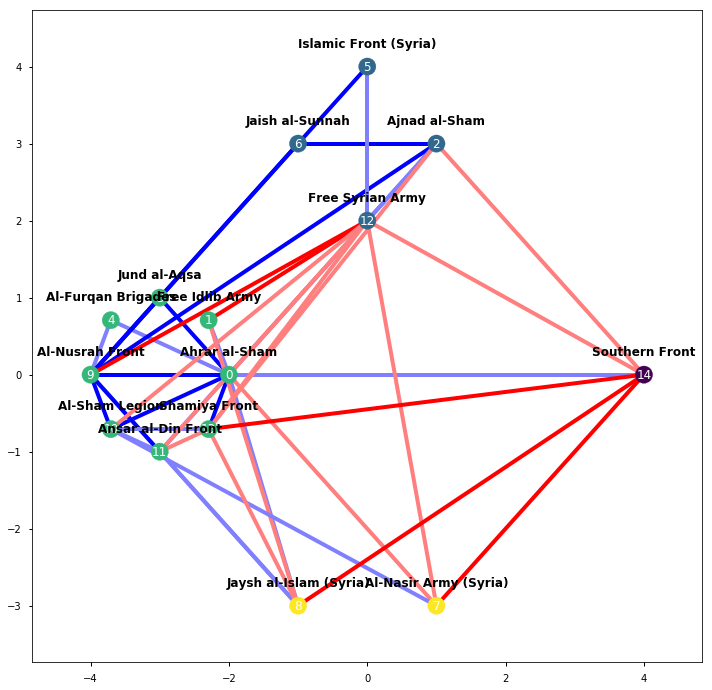

In [225]:
draw_graph(W, cgt, labels=groups[ids_keep])